In [5]:
# import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import timeit
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

%matplotlib inline

In [93]:
df = pd.read_csv("Pittsburgh_load_data.csv")
#df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y")
#df["Month"] = df["Date"].apply(lambda x: x.month)
#df.head()
x1 = df["High_temp"].values
x2 = df["Avg_temp"].values
y = df["MAX"].values
x = np.array([x1, x2])
#x = x.T

x = np.ndarray((2,len(x1)), buffer=x)
x = x.T
x

array([[  0.  ,  -1.68],
       [ -3.9 ,  -6.58],
       [  0.6 ,  -6.12],
       ...,
       [ -7.8 ,  -9.49],
       [ -7.8 ,  -9.25],
       [-10.6 , -14.1 ]])

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def iterating_over_degree(x, y, MAXdeg): 

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

    err_train = []
    err_cv = []

    for deg in range(MAXdeg):
        # create poly features
        Poly = PolynomialFeatures(degree = deg)
        X_train_poly = Poly.fit_transform(x_train.reshape(-1,1))
        X_test_poly = Poly.fit_transform(x_test.reshape(-1,1))

        # fit model
        model_L2 = Ridge(alpha = 0, normalize = True, solver = 'lsqr') # select least squares regression as solver
        model_L2.fit(X_train_poly, y_train)
        prediction = model_L2.predict(X_test_poly)

        # compute errors
        err_train.append(mean_squared_error(model_L2.predict(X_train_poly), y_train))
        err_cv.append(mean_squared_error(model_L2.predict(X_test_poly), y_test))

    plt.figure(figsize = (8,6))    
    plt.semilogy(range(MAXdeg), err_train, range(MAXdeg), err_cv)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Polynomial degree")
    plt.ylabel("Mean squared error")
    plt.show()

In [95]:
iterating_over_degree(x,y,50)

ValueError: Found input variables with inconsistent numbers of samples: [2554, 1277]

In [46]:
#def iterating_over_lambda (x, y, deg, MAXlambda):
def iterating_over_lambda (x, y, deg, MINlambda, MAXlambda):


    err_train = []
    err_cv = []
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

    for lam in np.logspace(MINlambda,MAXlambda,100):
        
        Poly = PolynomialFeatures(degree = deg)
        X_train_poly = Poly.fit_transform(x_train.reshape(-1,1))
        X_test_poly = Poly.fit_transform(x_test.reshape(-1,1))

        # fit model
        model_L2 = Ridge(alpha = lam, normalize = True, solver = 'lsqr') # select least squares regression as solver
        model_L2.fit(X_train_poly, y_train)
        prediction = model_L2.predict(X_test_poly)

        # compute errors
        err_train.append(mean_squared_error(model_L2.predict(X_train_poly), y_train))
        err_cv.append(mean_squared_error(model_L2.predict(X_test_poly), y_test))



    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(MINlambda,MAXlambda,100), err_train, np.logspace(MINlambda,MAXlambda,100), err_cv)
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()

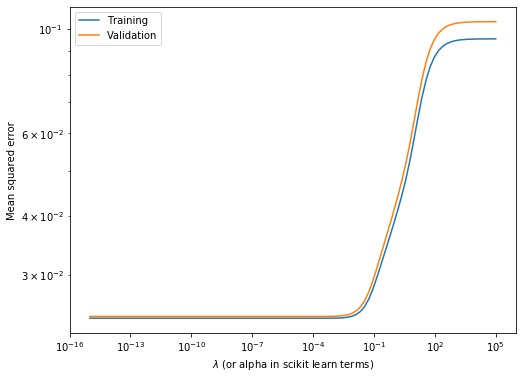

In [52]:
iterating_over_lambda(x,y,10,-15,5)

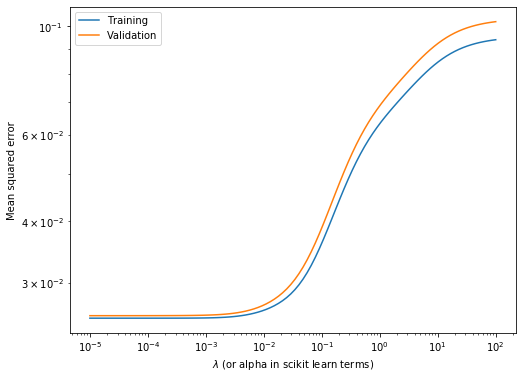

In [48]:
iterating_over_lambda(x,y,3,-5,2)

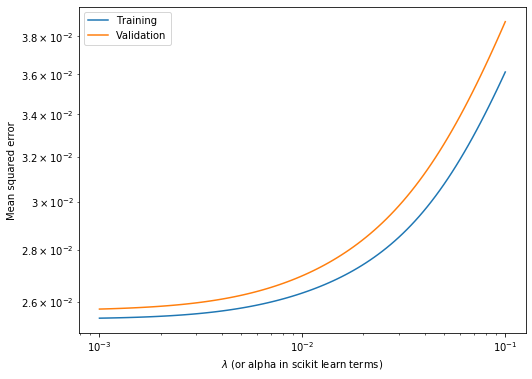

In [49]:
iterating_over_lambda(x,y,3,-3,-1)